## Business Problem:

n order to effectively produce quality decisions in the modern credit card industry, knowledge must be gained through effective data analysis and modelling. Through the use of dynamic data-driven decision-making tools and procedures, information can be gathered to successfully evaluate all aspects of credit card operations. PSPD Bank has banking operations in more than 50 countries across the globe. Mr. Jim Watson, CEO, wants to evaluate areas of bankruptcy, fraud and collections, respond to customer requests for help with proactive offers and services.

Following are some of Mr. Watson's questionsn to understand the customer spend and repayment behaviour

In [2]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [118]:
customer = pd.read_csv("E:/Analytix Lab/CASE STUDY/Python/4. Case Study 2 - Credit Card Case Study/Customer Acqusition.csv")
customer.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [36]:
repay = pd.read_csv("E:/Analytix Lab/CASE STUDY/Python/4. Case Study 2 - Credit Card Case Study/Repayment.csv")
repay

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN
...,...,...,...,...,...
1518,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN


In [38]:

# Specify the subset of columns to consider
subset_cols = [ 'Customer', 'Month', 'Amount']

# Drop rows with NaN values in the specified subset of columns
repay.dropna(subset=subset_cols, inplace=True)
repay = repay.drop(['SL No:','Unnamed: 4',], axis=1)
print(repay)

     Customer      Month     Amount
0          A1  12-Jan-04  495414.75
1          A1   3-Jan-04  245899.02
2          A1  15-Jan-04  259490.06
3          A1  25-Jan-04  437555.12
4          A1  17-Jan-05  165972.88
...       ...        ...        ...
1495      A67   9-May-05   55638.77
1496      A68  10-May-06  319836.49
1497      A69  11-Jul-06  247628.45
1498      A70  12-Aug-05  454016.51
1499      A71  13-Sep-04   56286.33

[1500 rows x 3 columns]


In [41]:
spend = pd.read_csv("E:/Analytix Lab/CASE STUDY/Python/4. Case Study 2 - Credit Card Case Study/spend.csv")
spend.head(2)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13


## Exploratory Data Analysis

In [42]:
print(customer.shape)
print(repay.shape)
print(spend.shape)

(100, 8)
(1500, 3)
(1500, 5)


In [47]:
customer.dtypes


No            int64
Customer     object
Age           int64
City         object
Product      object
Limit       float64
Company      object
Segment      object
dtype: object

In [44]:
repay.dtypes

Customer     object
Month        object
Amount      float64
dtype: object

In [45]:
spend.dtypes

Sl No:        int64
Customer     object
Month        object
Type         object
Amount      float64
dtype: object

In [49]:
customer.isnull().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [50]:
repay.isnull().sum()

Customer    0
Month       0
Amount      0
dtype: int64

In [51]:
spend.isnull().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

### (1) In the above dataset,
#### (a) In case age is less than 18, replace it with mean of age values.

In [121]:
original_mean = customer["Age"].mean()
original_mean

46.49

In [122]:
New_mean_age = customer.loc[customer['Age'] > 18, 'Age'].mean()

# replacing above new mean age with original dataset
customer.loc[customer['Age'] < 18, 'Age'] = New_mean_age


print(customer['Age'].mean())

48.52127659574469


In [123]:
print("All the customers who have age less than 18 have been replaced by mean of the Age column.")

All the customers who have age less than 18 have been replaced by mean of the Age column.


### (b) In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
(customer’s limit provided in acquisition table is the per transaction limit on his card)

In [124]:
customer.head(5)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [125]:
# checking spends
spend.head(10)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
5,6,A1,23-Feb-05,SANDALS,168285.60
6,7,A1,1-Feb-05,CAR,23370.20
7,8,A8,5-Feb-04,BIKE,155562.58
8,9,A9,28-Feb-05,AUTO,38269.94
9,10,A10,16-Feb-05,SHOPPING,194795.88


In [126]:
# merging customer and spend table on the basis of "Customer" column

customer_spend = pd.merge(left = customer , right = spend, on = 'Customer', how = 'inner')

In [127]:
customer_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,139018.26
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,284521.06
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,90184.22


In [128]:
customer_spend[customer_spend['Amount'] > customer_spend['Limit']]

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
18,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,104,3-Jan-04,RENTAL,199554.72
19,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,118,28-Feb-05,TRAIN TICKET,376887.49
20,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,132,6-Apr-04,BUS TICKET,439648.53
21,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,146,23-Nov-04,PETRO,384078.73
22,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,160,3-Sep-05,JEWELLERY,117089.16
...,...,...,...,...,...,...,...,...,...,...,...,...
1486,87,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,89,30-Mar-06,RENTAL,483886.62
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,139018.26
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,284521.06
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,90184.22


In [129]:
# now replacing the spends beyond of limit to 50%

customer_spend.loc[customer_spend['Amount'] > customer_spend['Limit'], 'Amount' ] = (50 * customer_spend['Limit'])/100


In [130]:
customer_spend.head(20)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07
5,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,6,23-Feb-05,SANDALS,168285.60
6,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,7,1-Feb-05,CAR,23370.20
7,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,103,12-Jan-04,TRAIN TICKET,440563.22
8,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,117,5-Feb-04,BUS TICKET,52208.65
9,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,131,19-Apr-06,AIR TICKET,346925.68


### (c) Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [131]:
customer.head(1)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [132]:
repay.head(1)

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75


In [133]:
customer_repay = pd.merge(left = customer, right = repay, on = "Customer", how = 'inner')
customer_repay.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02


In [136]:
customer_repay.loc[customer_repay['Amount'] > customer_repay['Limit'], 'Amount'] = customer_repay['Limit']
customer_repay.head(20)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,165972.88
5,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,23-Feb-05,365366.62
6,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1-Feb-05,14473.41
7,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,350446.82
8,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5-Feb-04,117964.43
9,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,19-Apr-06,79849.19


In [137]:
customer_repay[customer_repay['Amount'] > customer_repay['Limit']]

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount


In [135]:
# hence above, all repayment replaced with limits, which were exceeding the defined limts column

## 2. From the above dataset, create the following summaries:

#### a. How many distinct customers exist?

In [138]:
Dict_customer = customer['Customer'].nunique()

print('there are unique customer are: ', Dict_customer)

there are unique customer are:  100


#### (b) How many distinct categories exist?

In [139]:
dist_seg = customer['Segment'].value_counts()

dist_seg1 = customer['Segment'].nunique()
print('No. of unique Categories are:', dist_seg1)
print('there are unique Categories are: \n', dist_seg)

No. of unique Categories are: 5
there are unique Categories are: 
 Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: Segment, dtype: int64


#### c. What is the average monthly spend by customers?


In [140]:
# Converting month to YYYY-MM-DD format

spend['Month'] = pd.to_datetime(spend['Month'])

In [323]:
spend.head(2)

,Sl No:,Customer,Month,Type,Amount,Monthly,Yearly
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,2004
1,2,A1,2004-01-03,PETRO,410556.13,1,2004


In [271]:
#creating new columns which show "Monthly" and "Yearly"

spend['Monthly'] = spend['Month'].dt.month

spend['Yearly'] = spend['Month'].dt.year

spend

,Sl No:,Customer,Month,Type,Amount,Monthly,Yearly
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,2004
1,2,A1,2004-01-03,PETRO,410556.13,1,2004
2,3,A1,2004-01-15,CLOTHES,23740.46,1,2004
3,4,A1,2004-01-25,FOOD,484342.47,1,2004
4,5,A1,2005-01-17,CAMERA,369694.07,1,2005
...,...,...,...,...,...,...,...
1495,1496,A67,2006-02-04,BUS TICKET,356872.73,2,2006
1496,1497,A68,2006-03-25,BUS TICKET,204971.10,3,2006
1497,1498,A69,2006-03-31,BUS TICKET,50449.44,3,2006
1498,1499,A70,2006-03-23,BUS TICKET,80593.94,3,2006


In [156]:
#grouping the dataset based on 'Yearly' and 'monthly'
customer_spend_group= round(spend.groupby(['Yearly','Monthly'])['Amount'].mean(),2)

In [159]:
customer_spend_group

Yearly  Monthly
2004    1          251712.07
        2          221215.27
        3          232146.12
        4          235272.04
        5          217539.24
        9          310923.38
        11         270486.40
2005    1          292741.37
        2          229802.28
        4          252181.33
        5          245696.52
        6          262688.11
        7          229116.66
        8          233734.63
        9          188666.20
        10         194568.64
        11         286143.32
        12         147503.06
2006    1          282058.01
        2          253858.26
        3          247166.08
        4          232468.97
        5          236162.74
        6          177252.39
        7          287505.10
        8          240699.72
        9          158520.09
        10         236136.34
        11         182841.29
        12         270470.98
Name: Amount, dtype: float64

### (d) What is the average monthly repayment by customers?

In [161]:
repay.head(2)

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02


In [ ]:
#Converting Date to YYYY-MM-DD formate

In [162]:
repay['Month'] = pd.to_datetime(repay['Month'])

In [164]:
repay.head(2)

,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02


In [167]:
#creating new columns which  will show "Monthly" and "Yearly"

repay['Monthly'] = repay['Month'].dt.month
repay['Yearly'] = repay['Month'].dt.year

repay

,Customer,Month,Amount,Monthly,Yearly
0,A1,2004-01-12,495414.75,1,2004
1,A1,2004-01-03,245899.02,1,2004
2,A1,2004-01-15,259490.06,1,2004
3,A1,2004-01-25,437555.12,1,2004
4,A1,2005-01-17,165972.88,1,2005
...,...,...,...,...,...
1495,A67,2005-05-09,55638.77,5,2005
1496,A68,2006-05-10,319836.49,5,2006
1497,A69,2006-07-11,247628.45,7,2006
1498,A70,2005-08-12,454016.51,8,2005


In [171]:
#grouping the dataset based on 'Yearly' and 'monthly'

Customer_repay_group = round(repay.groupby(['Yearly', 'Monthly'])['Amount'].mean(),2)

Customer_repay_group

Yearly  Monthly
2004    1          243489.65
        2          256702.63
        3          252585.28
        4          259141.68
        5          226162.72
        9          184487.85
        11         209592.24
2005    1          240548.10
        2          238829.27
        4          212688.63
        5          263207.37
        6          210199.82
        7          239871.48
        8          264430.92
        9          247700.17
        10         219849.96
        11         256695.12
        12         320379.34
2006    1          293475.39
        2          284489.57
        3          240851.27
        4          275472.25
        5          256920.88
        6          251990.45
        7          257936.38
        8          224143.99
        9          262533.88
        10         260765.48
        11         199399.20
        12         252736.57
Name: Amount, dtype: float64

### (e) If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?

In [267]:
#merging all the three tables. 
#We have merged 'customer and spend' table in 'customer_spend'. 
#Using "customer_spend" and "repay"
#table to form the final "customer_spend_repay" table


customer_spend.head(2)


,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_Group,Age Group
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,"(70.5, 79.25]",74-82
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,"(70.5, 79.25]",74-82


In [177]:
repay.head(2)

,Customer,Month,Amount,Monthly,Yearly
0,A1,2004-01-12,495414.75,1,2004
1,A1,2004-01-03,245899.02,1,2004


In [188]:
customer_spend_repay = pd.merge(left = customer_spend, right = repay, on = 'Customer', how = 'inner', suffixes = ['_Spend', '_repay']  )

customer_spend_repay

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_Spend,Type,Amount_Spend,Month_repay,Amount_repay,Monthly,Yearly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,2004-01-12,495414.75,1,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,2004-01-03,245899.02,1,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,2004-01-15,259490.06,1,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,2004-01-25,437555.12,1,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,2005-01-17,165972.88,1,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,2004-01-25,310992.30,1,2004
37280,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00,2004-01-12,121874.90,1,2004
37281,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50,2004-01-03,337815.57,1,2004
37282,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00,2004-01-15,25682.73,1,2004


In [199]:
# grouping the data based on "Yearly","Month_x" columns to get the 'Amount_Spend'and 'Amount_Repay'

interest_group = customer_spend_repay.groupby(['Yearly', 'Monthly'])['Amount_Spend','Amount_repay'].sum()
interest_group

C:\Users\onlyb\AppData\Local\Temp\ipykernel_4176\3405797214.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  interest_group = customer_spend_repay.groupby(['Yearly', 'Monthly'])['Amount_Spend','Amount_repay'].sum()


Amount_Spend  Amount_repay
Yearly Monthly                            
2004   1        1.088357e+09  1.699210e+09
       2        7.613922e+07  1.602419e+08
       3        5.594171e+07  8.974470e+07
       4        1.194516e+08  2.285403e+08
       5        8.800456e+07  1.411594e+08
       9        5.144278e+07  8.016122e+07
       11       5.504612e+07  7.860290e+07
2005   1        1.324129e+08  1.810333e+08
       2        5.890557e+08  9.416163e+08
       4        9.366405e+07  1.747894e+08
       5        7.149030e+08  1.099197e+09
       6        1.174019e+08  2.213774e+08
       7        3.995653e+07  7.997268e+07
       8        1.361400e+08  2.477449e+08
       9        3.195551e+07  7.530449e+07
       10       3.140993e+07  6.027830e+07
       11       1.532278e+08  2.763119e+08
       12       4.348638e+07  9.944533e+07
2006   1        5.127574e+07  8.974491e+07
       2        1.654843e+08  2.903280e+08
       3        7.393854e+08  1.115725e+09
       4        3.229722e+08  6.093666e+08
       5        3.297954e+08  5.434823e+08
       6        5.302118e+07  6.914431e+07
       7        1.444093e+08  2.245720e+08
       8        5.849630e+07  7.167032e+07
       9        5.395681e+07  8.083199e+07
       10       5.285823e+07  7.890924e+07
       11       1.124836e+08  1.355832e+08
       12       4.585222e+07  7.087702e+07

In [205]:
 # Monthly Profit = Monthly repayment – Monthly spend.
interest_group['Monthly_Profit'] = interest_group['Amount_repay'] - interest_group['Amount_Spend']

interest_group

Amount_Spend  Amount_repay  Monthly Profit  Monthly_Profit
Yearly Monthly                                                            
2004   1        1.088357e+09  1.699210e+09    6.108525e+08    6.108525e+08
       2        7.613922e+07  1.602419e+08    8.410268e+07    8.410268e+07
       3        5.594171e+07  8.974470e+07    3.380298e+07    3.380298e+07
       4        1.194516e+08  2.285403e+08    1.090887e+08    1.090887e+08
       5        8.800456e+07  1.411594e+08    5.315485e+07    5.315485e+07
       9        5.144278e+07  8.016122e+07    2.871844e+07    2.871844e+07
       11       5.504612e+07  7.860290e+07    2.355678e+07    2.355678e+07
2005   1        1.324129e+08  1.810333e+08    4.862042e+07    4.862042e+07
       2        5.890557e+08  9.416163e+08    3.525606e+08    3.525606e+08
       4        9.366405e+07  1.747894e+08    8.112539e+07    8.112539e+07
       5        7.149030e+08  1.099197e+09    3.842944e+08    3.842944e+08
       6        1.174019e+08  2.213774e+08    1.039755e+08    1.039755e+08
       7        3.995653e+07  7.997268e+07    4.001615e+07    4.001615e+07
       8        1.361400e+08  2.477449e+08    1.116049e+08    1.116049e+08
       9        3.195551e+07  7.530449e+07    4.334898e+07    4.334898e+07
       10       3.140993e+07  6.027830e+07    2.886837e+07    2.886837e+07
       11       1.532278e+08  2.763119e+08    1.230841e+08    1.230841e+08
       12       4.348638e+07  9.944533e+07    5.595895e+07    5.595895e+07
2006   1        5.127574e+07  8.974491e+07    3.846917e+07    3.846917e+07
       2        1.654843e+08  2.903280e+08    1.248436e+08    1.248436e+08
       3        7.393854e+08  1.115725e+09    3.763400e+08    3.763400e+08
       4        3.229722e+08  6.093666e+08    2.863944e+08    2.863944e+08
       5        3.297954e+08  5.434823e+08    2.136869e+08    2.136869e+08
       6        5.302118e+07  6.914431e+07    1.612313e+07    1.612313e+07
       7        1.444093e+08  2.245720e+08    8.016271e+07    8.016271e+07
       8        5.849630e+07  7.167032e+07    1.317402e+07    1.317402e+07
       9        5.395681e+07  8.083199e+07    2.687518e+07    2.687518e+07
       10       5.285823e+07  7.890924e+07    2.605102e+07    2.605102e+07
       11       1.124836e+08  1.355832e+08    2.309955e+07    2.309955e+07
       12       4.585222e+07  7.087702e+07    2.502480e+07    2.502480e+07

In [209]:
#interest earned is 2.9% of Monthly Profit

interest_group['interest_earned'] = (interest_group['Monthly_Profit']*2.9)/100
interest_group

Amount_Spend  Amount_repay  Monthly Profit  Monthly_Profit  \
Yearly Monthly                                                               
2004   1        1.088357e+09  1.699210e+09    6.108525e+08    6.108525e+08   
       2        7.613922e+07  1.602419e+08    8.410268e+07    8.410268e+07   
       3        5.594171e+07  8.974470e+07    3.380298e+07    3.380298e+07   
       4        1.194516e+08  2.285403e+08    1.090887e+08    1.090887e+08   
       5        8.800456e+07  1.411594e+08    5.315485e+07    5.315485e+07   
       9        5.144278e+07  8.016122e+07    2.871844e+07    2.871844e+07   
       11       5.504612e+07  7.860290e+07    2.355678e+07    2.355678e+07   
2005   1        1.324129e+08  1.810333e+08    4.862042e+07    4.862042e+07   
       2        5.890557e+08  9.416163e+08    3.525606e+08    3.525606e+08   
       4        9.366405e+07  1.747894e+08    8.112539e+07    8.112539e+07   
       5        7.149030e+08  1.099197e+09    3.842944e+08    3.842944e+08   
       6        1.174019e+08  2.213774e+08    1.039755e+08    1.039755e+08   
       7        3.995653e+07  7.997268e+07    4.001615e+07    4.001615e+07   
       8        1.361400e+08  2.477449e+08    1.116049e+08    1.116049e+08   
       9        3.195551e+07  7.530449e+07    4.334898e+07    4.334898e+07   
       10       3.140993e+07  6.027830e+07    2.886837e+07    2.886837e+07   
       11       1.532278e+08  2.763119e+08    1.230841e+08    1.230841e+08   
       12       4.348638e+07  9.944533e+07    5.595895e+07    5.595895e+07   
2006   1        5.127574e+07  8.974491e+07    3.846917e+07    3.846917e+07   
       2        1.654843e+08  2.903280e+08    1.248436e+08    1.248436e+08   
       3        7.393854e+08  1.115725e+09    3.763400e+08    3.763400e+08   
       4        3.229722e+08  6.093666e+08    2.863944e+08    2.863944e+08   
       5        3.297954e+08  5.434823e+08    2.136869e+08    2.136869e+08   
       6        5.302118e+07  6.914431e+07    1.612313e+07    1.612313e+07   
       7        1.444093e+08  2.245720e+08    8.016271e+07    8.016271e+07   
       8        5.849630e+07  7.167032e+07    1.317402e+07    1.317402e+07   
       9        5.395681e+07  8.083199e+07    2.687518e+07    2.687518e+07   
       10       5.285823e+07  7.890924e+07    2.605102e+07    2.605102e+07   
       11       1.124836e+08  1.355832e+08    2.309955e+07    2.309955e+07   
       12       4.585222e+07  7.087702e+07    2.502480e+07    2.502480e+07   

                interest_earned  
Yearly Monthly                   
2004   1           1.771472e+07  
       2           2.438978e+06  
       3           9.802865e+05  
       4           3.163572e+06  
       5           1.541491e+06  
       9           8.328349e+05  
       11          6.831466e+05  
2005   1           1.409992e+06  
       2           1.022426e+07  
       4           2.352636e+06  
       5           1.114454e+07  
       6           3.015290e+06  
       7           1.160468e+06  
       8           3.236542e+06  
       9           1.257121e+06  
       10          8.371827e+05  
       11          3.569438e+06  
       12          1.622810e+06  
2006   1           1.115606e+06  
       2           3.620465e+06  
       3           1.091386e+07  
       4           8.305437e+06  
       5           6.196920e+06  
       6           4.675707e+05  
       7           2.324719e+06  
       8           3.820465e+05  
       9           7.793803e+05  
       10          7.554795e+05  
       11          6.698869e+05  
       12          7.257193e+05

### (f) What are the top 5 product types?

In [211]:
spend.head(5)

,Sl No:,Customer,Month,Type,Amount,Monthly,Yearly
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,2004
1,2,A1,2004-01-03,PETRO,410556.13,1,2004
2,3,A1,2004-01-15,CLOTHES,23740.46,1,2004
3,4,A1,2004-01-25,FOOD,484342.47,1,2004
4,5,A1,2005-01-17,CAMERA,369694.07,1,2005


In [218]:
#using value_counts() method on the 'Product' column to count the occurrences of each product type.

product_type_count = spend['Type'].value_counts()

product_type_count.head(5)

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

### g. Which city is having maximum spend?

In [280]:
customer_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,74-82
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,74-82


In [228]:
city_with_max_Spend = customer_spend.groupby('City')['Amount'].sum().sort_values(ascending = False)

In [235]:
city_with_max_Spend

City
COCHIN        45963513.50
CALCUTTA      41108132.30
BANGALORE     40461647.02
BOMBAY        28603127.38
CHENNAI       22128635.65
TRIVANDRUM    15337155.87
PATNA         15260586.97
DELHI         10918286.54
Name: Amount, dtype: float64

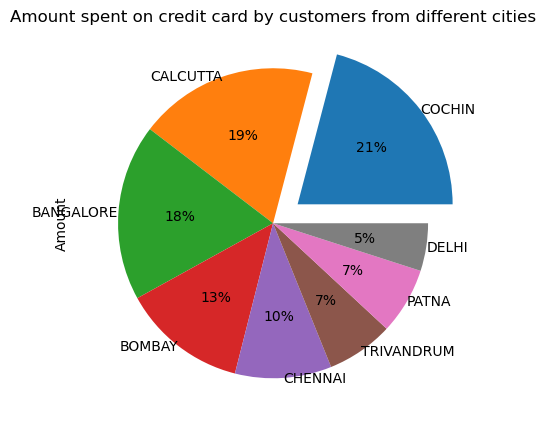

In [246]:
plt.figure(figsize = (5, 6) )
city_with_max_Spend.plot(kind="pie",autopct="%1.0f%%",labeldistance=1.0,explode=[0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
plt.title("Amount spent on credit card by customers from different cities")
plt.show()

### (h) Which age group is spending more money?

In [265]:
customer_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_Group,Age Group
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,"(70.5, 79.25]",74-82
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,"(70.5, 79.25]",74-82


In [285]:
#creating new column "Age Group" with 8 bins between 18 to 88 
customer_spend["Age_Group"] =  pd.cut(customer_spend["Age"],bins=np.arange(18,88,8),labels=["18-26","26-34", "34-42" ,"42-50" ,"50-58","58-66","66-74","74-82"],include_lowest=True)

In [295]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_Group
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,74-82
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,74-82
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,74-82
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,74-82
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,74-82


In [300]:
age_group_spend = customer_spend.groupby('Age_Group')['Amount'].sum().sort_values(ascending = False)

age_group_spend

Age_Group
42-50    53242390.70
34-42    38037826.50
26-34    30553459.81
18-26    25233896.65
50-58    22454066.68
74-82    19770884.32
66-74    17705877.44
58-66    12782683.13
Name: Amount, dtype: float64

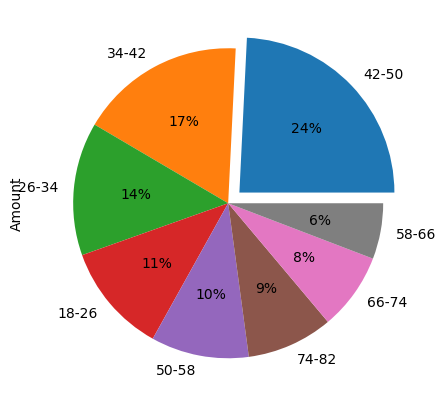

In [302]:
plt.figure(figsize = (5,6))
age_group_spend.plot(kind = "pie",autopct="%1.0f%%",explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
plt.show()


### (i) Who are the top 10 customers in terms of repayment?

In [304]:
customer_repay.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02


In [311]:
T10_customer = customer_repay.groupby('Customer')['Amount'].sum().sort_values(ascending = False)

T10_customer.head(10)

Customer
A61    10539142.91
A60     9876290.74
A13     9572000.66
A43     8489871.46
A45     8448334.87
A12     8334760.16
A14     7943268.63
A44     7744730.12
A39     7622483.30
A42     7615460.86
Name: Amount, dtype: float64

### (3) Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [314]:
customer_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_Group
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,74-82
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,74-82


In [320]:
#converting "Month" column to date time 

customer_spend['Date_spend'] = pd.to_datetime(customer_spend['Month'])

customer_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_Group,Date_spend
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,74-82,2004-01-12
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,74-82,2004-01-03


In [326]:
customer_spend['Yearly_spend'] = customer_spend['Date_spend'].dt.year
customer_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_Group,Date_spend,Yearly_spend
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,74-82,2004-01-12,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,74-82,2004-01-03,2004


In [400]:
# Applying city wise pivot table on each product on yearly basis

customer_spend_pivot = pd.pivot_table(data = customer_spend, index = ['City', 'Yearly_spend'],columns='Product',
                      aggfunc = 'sum', values='Amount')

customer_spend_pivot

Product                         Gold    Platimum      Silver
City       Yearly_spend                                     
BANGALORE  2004           9289878.54  1112732.30  1291852.58
           2005          12892362.99   912284.97   830612.34
           2006          12030611.09   685831.27  1415480.94
BOMBAY     2004           6987853.53   897264.94   532089.03
           2005           8983018.28   711804.94   508988.54
           2006           7917144.31   972130.01  1092833.80
CALCUTTA   2004           7477140.98  2037690.30   500006.00
           2005          10303355.80  4434696.31   440147.06
           2006          11167532.77  3589606.66  1157956.42
CHENNAI    2004           1059618.50  3535652.38   282056.86
           2005           3740945.58  5053956.32   377184.49
           2006           2704288.62  5024923.40   350009.50
COCHIN     2004           7315850.15  3419904.07   814229.62
           2005          12110613.03  4960921.71   652269.38
           2006          10499142.38  4920592.29  1269990.87
DELHI      2004           2806495.00   283512.89   768172.30
           2005           1964845.27   494157.86   612311.21
           2006           2957103.32   176788.72   854899.97
PATNA      2004           2072567.90  1113069.60   756684.10
           2005           3252615.77  2883231.07   950094.19
           2006           2276181.69  1256137.65   700005.00
TRIVANDRUM 2004           2415102.84  2161676.67   209667.48
           2005           1240375.85  3601443.30   269912.99
           2006           2735710.87  2147403.75   555862.12

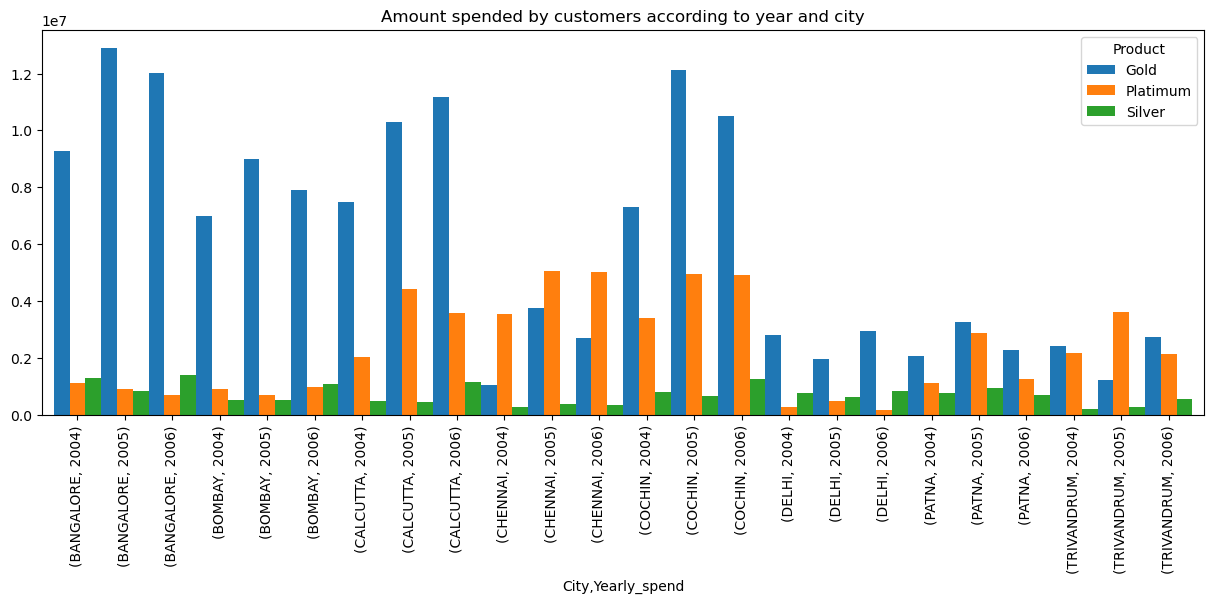

In [404]:
customer_spend_pivot.plot(kind = 'bar', figsize = (15,5), width = 1.0)
plt.title("Amount spended by customers according to year and city")
plt.show()

## (4) Create graphs for

### (a) Monthly comparison of total spends, city wise

In [363]:
customer_spend.head(2)


,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_Group,Date_spend,Yearly_spend
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,74-82,2004-01-12,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,74-82,2004-01-03,2004


In [367]:
customer_spend['Monthly_spend'] = customer_spend['Date_spend'].dt.month 
customer_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_Group,Date_spend,Yearly_spend,Monthly_spend
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,74-82,2004-01-12,2004,1
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,74-82,2004-01-03,2004,1


In [383]:
customer_spend_monthly_city = pd.pivot_table(data = customer_spend, values= 'Amount', index = 'City', columns = 'Monthly_spend', aggfunc = 'sum')
customer_spend_monthly_city

Monthly_spend,1,2,3,4,5,6,7,8,9,10,11,12
City,,,,,,,,,,,,
BANGALORE,9041796.84,6734494.76,5362903.07,4207980.48,6383115.13,1330685.90,2228217.69,695061.95,703018.28,1091602.61,2260603.07,422167.24
BOMBAY,5948993.33,4276988.30,5227850.50,1873785.01,3891945.60,1172594.97,177726.32,1066744.75,1278402.79,676005.70,2872049.40,140040.71
CALCUTTA,9064864.90,8150545.61,4939040.04,3457507.95,5578246.87,2293045.81,2234573.27,1548354.02,1511713.57,196357.83,2078880.93,55001.50
CHENNAI,4466961.36,4385815.95,3183643.71,2518656.99,2856199.62,1244242.16,693825.77,305875.97,745759.40,156247.17,1347779.28,223628.27
COCHIN,11714373.54,5747886.38,5645146.53,3882744.94,6581085.69,2495745.07,1290897.30,2317306.61,1382242.90,868551.89,3127999.60,909533.05
DELHI,2714261.45,1494064.06,2267149.02,777240.75,1600322.07,511276.09,50001.50,155402.16,50001.00,64615.46,391610.96,842342.02
PATNA,4916205.55,2353333.55,1437166.61,2338179.53,2136586.80,746186.13,50000.00,419383.64,70329.95,329537.34,413677.87,50000.00
TRIVANDRUM,3704336.99,2857123.89,2392316.51,1199293.45,2813534.48,400336.83,260484.50,453773.94,186063.70,285581.92,143387.40,640922.26


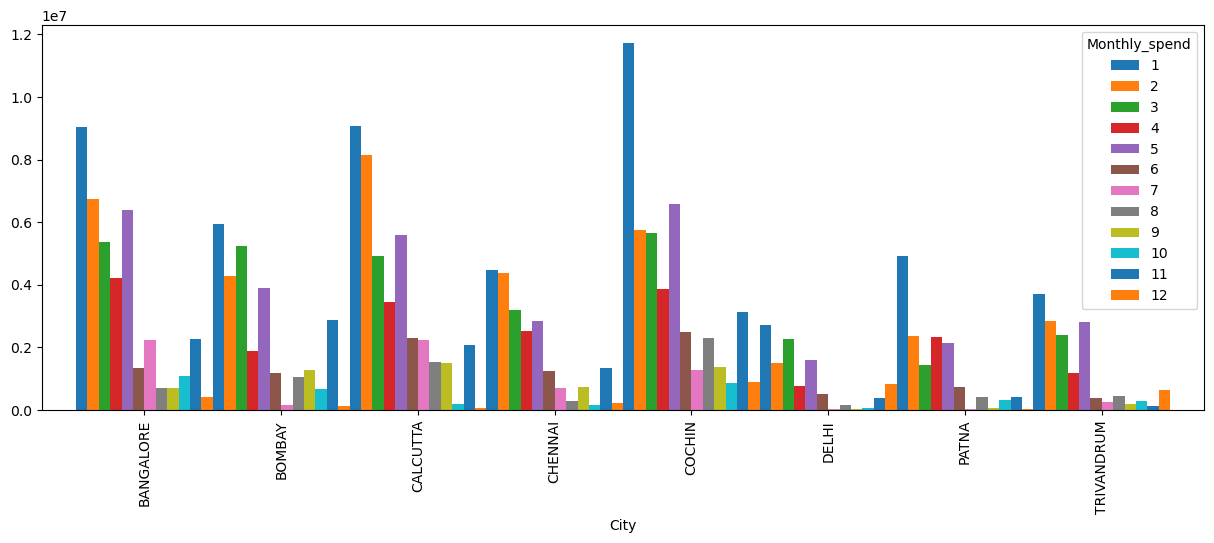

In [406]:
customer_spend_monthly_city.plot(kind="bar",figsize=(15,5),width=1.0)
plt.show()


### (b) Comparison of yearly spend on air tickets

In [407]:
customer_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_Group,Date_spend,Yearly_spend,Monthly_spend
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,74-82,2004-01-12,2004,1
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,74-82,2004-01-03,2004,1


In [416]:
customer_spend_type = customer_spend.groupby(['Yearly_spend', 'Type'])['Amount'].sum().reset_index()

customer_spend_type.head(2)

,Yearly_spend,Type,Amount
0,2004,AIR TICKET,4357225.35
1,2004,AUTO,254745.28


In [420]:
customer_spend_Air = customer_spend_type.loc[ customer_spend_type['Type'] == "AIR TICKET" ]

customer_spend_Air

,Yearly_spend,Type,Amount
0,2004,AIR TICKET,4357225.35
15,2005,AIR TICKET,10550152.21
30,2006,AIR TICKET,5248469.56


### (c) Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [421]:
customer_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_Group,Date_spend,Yearly_spend,Monthly_spend
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,74-82,2004-01-12,2004,1
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,74-82,2004-01-03,2004,1


In [436]:
# Define a mapping dictionary for month names
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Convert the string numbers representing month names to words
customer_spend['Monthly_spend_Word'] = customer_spend['Monthly_spend'].map(month_mapping)


customer_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_Group,Date_spend,Yearly_spend,Monthly_spend,Monthly_spend_Word
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,74-82,2004-01-12,2004,1,January
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,74-82,2004-01-03,2004,1,January


In [441]:
customer_spend_on_each_product = pd.pivot_table(data =customer_spend,  values='Amount',index='Monthly_spend_Word',columns='Product',
                                                aggfunc='sum',sort=False)

customer_spend_on_each_product.T

Monthly_spend_Word,January,February,April,November,August,October,May,September,December,March,July,June
Product,,,,,,,,,,,,
Gold,32413831.83,24779179.55,13170572.59,9203267.46,4954030.42,3018223.38,21548169.76,3816887.62,2332940.96,19256972.48,5167416.37,6538862.64
Platimum,14951578.51,9134054.58,5182493.86,2741618.42,1714762.80,550275.04,8151926.49,1667840.84,750156.19,7288837.68,1288156.26,2965712.71
Silver,4206383.62,2087018.37,1902322.65,691102.63,293109.82,100001.50,2140940.01,442803.13,200537.90,3909405.83,530153.72,689537.61


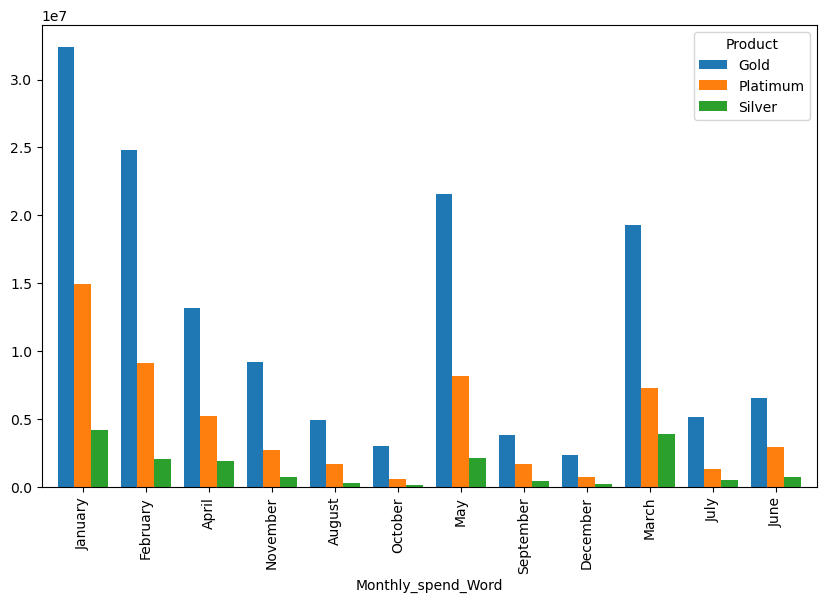

In [446]:
customer_spend_on_each_product.plot(kind ='bar', figsize=(10,6),width=0.8 )
plt.show()

In [447]:
print("Hence January Month has maximum spending")

Hence January Month has maximum spending


### (5) Write user defined PYTHON function to perform the following analysis: You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [450]:
customer_repay.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02


In [453]:
# converting 'Month' column to date time format

customer_repay['Month']= pd.to_datetime(customer_repay['Month'])
customer_repay.head(2)


,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02


In [456]:
#creating new column "Monthly" and "Yearly" using already existing 'Month' column

customer_repay['Monthly'] = customer_repay['Month'].apply(lambda x: pd.Timestamp.strftime(x, format = '%B'))
customer_repay['Yearly'] = customer_repay['Month'].apply(lambda x : pd.Timestamp.strftime(x, format = '%Y'))

customer_repay.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,Monthly,Yearly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,January,2004


In [466]:
# Defining function

def summary_report(product,timeperiod):
    
    if product.lower()=='gold' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
        
    elif product.lower()=='gold' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
        
    elif product.lower()=='silver' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
        
    elif product.lower()=='silver' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
        
    if product.lower()=='platinum' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
        
    elif product.lower()=='platinum' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
        
    return result
    

In [467]:
# Defining Calling function
summary_report('silver','yearly')

Yearly                             2004        2005        2006
Product City       Customer                                    
Silver  BANGALORE  A18        491592.71   638296.41   700000.00
                   A23        664965.71  1000010.00   872925.32
                   A59        676557.50   427247.08   600018.00
                   A72        100000.00         NaN         NaN
                   A76              NaN   265619.05         NaN
                   A77              NaN         NaN     3159.62
        COCHIN     A100        69551.19         NaN         NaN
                   A25        786338.08   611555.69  1000030.00
                   A7         500005.00   422177.27   608997.87
                   A74              NaN   100002.00         NaN
                   A79              NaN         NaN   193230.31
        CALCUTTA   A2         400000.00   410274.00   200000.00
                   A58        533815.62   540173.85   411640.17
                   A73              NaN   100001.00         NaN
                   A78              NaN         NaN    55344.81
                   A87              NaN         NaN   100003.00
        BOMBAY     A22        953419.47  1141542.81   945271.83
                   A75              NaN   100003.00         NaN
                   A80              NaN         NaN   481205.64
        CHENNAI    A85              NaN         NaN   100001.00
                   A9         380193.34   500015.00   697845.29
                   A96        100000.00         NaN         NaN
        TRIVANDRUM A57       1000010.00   200002.00   655926.99
                   A68        100000.00         NaN   100000.00
                   A86              NaN         NaN   100002.00
        PATNA      A46        713614.32  1116730.89   839228.07
                   A8         800016.00   400008.00   531812.40
                   A84              NaN         NaN   100000.00
        DELHI      A24        397014.53  1184870.98   711068.52
                   A6         548574.15   427398.18   507280.51